In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

MALE_RECOVERED  :  366
FEMALE_RECOVERED  :  142
MALE_DEATH  :  349
FEMALE_DEATH  :  145


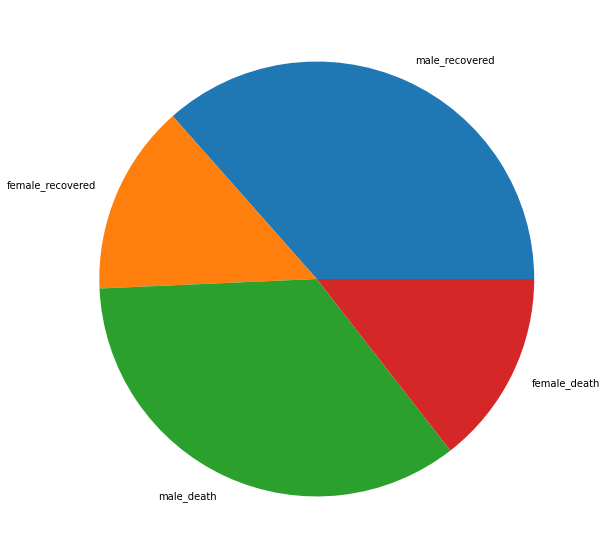

In [ ]:
df = pd.read_csv("covidDataset.csv")

key_counts = {}
key_counts['male_recovered'] = 0 
key_counts['female_recovered'] = 0
key_counts['male_death'] = 0
key_counts['female_death'] = 0

for gender,status in zip(df['Gender'],df['Status']):
  if gender == 'Male':
    if status == 'Recovered':
      key_counts['male_recovered'] += 1
    else:
      key_counts['male_death'] += 1
  else:
    if status == 'Recovered':
      key_counts['female_recovered'] += 1
    else:
      key_counts['female_death'] += 1


for key,value in key_counts.items():
  print(key.upper()," : ",value)

fig = plt.figure(figsize =(13, 10))
plt.pie(key_counts.values(),labels = key_counts.keys())
plt.show()